In [1]:
from fastai import *
from fastai.vision import *

In [3]:
!unrar x "/content/drive/My Drive/Plate_detect_and_recognize.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Plate_detect_and_recognize.rar

Creating    __pycache__                                               OK
Extracting  __pycache__/use.cpython-36.pyc                                 0%  OK 
Creating    baza_slika                                                OK
Creating    baza_slika/040603                                         OK
Extracting  baza_slika/040603/P1010001.jpg                                 0%  OK 
Extracting  baza_slika/040603/P1010002.jpg                                 0%  OK 
Extracting  baza_slika/040603/P1010003.jpg                                 0%  OK 
Extracting  baza_slika/040603/P1010004.jpg                                 0%  OK 
Extracting  baza_slika/040603/P1010005.jpg                                 0%  OK 
Extracting  baza_slika/040603/P1010006.jpg                                 0%  

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = '/content/drive/My Drive/Vehicle Classification/train/train'

In [ ]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.4,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Ambulance', 'Bus', 'Car', 'Limousine', 'Motorcycle', 'Taxi', 'Truck', 'Van']

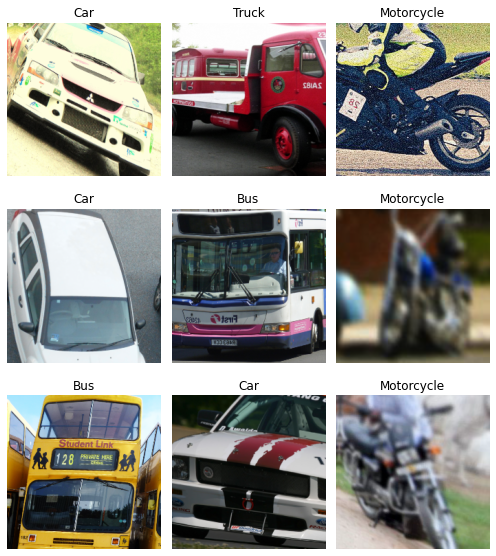

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.965339,0.567511,0.179716,1:03:39
1,0.633155,0.460247,0.149086,16:55
2,0.510583,0.417833,0.142522,17:06
3,0.460115,0.408665,0.138928,17:18


In [ ]:
learn.save('/content/drive/My Drive/Vehicle Classification/vehicle_classifier')

In [ ]:
learn.export(file = Path("/content/drive/My Drive/Vehicle Classification/vehicle_classifier.pkl"))

In [4]:
from fastai import *
from fastai.vision import *

model = load_learner('/content/drive/My Drive','vehicle_classifier.pkl')
model1=load_learner('/content/drive/My Drive','emergency_classifier.pkl')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

<Figure size 1008x288 with 0 Axes>

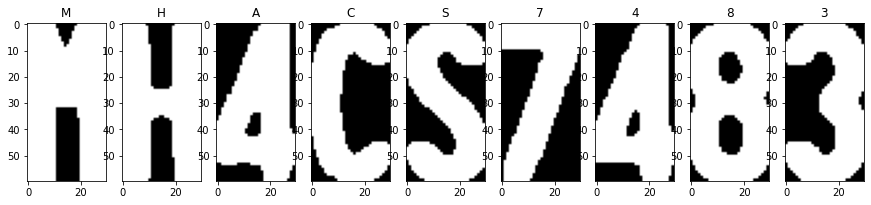

<Figure size 1008x288 with 0 Axes>

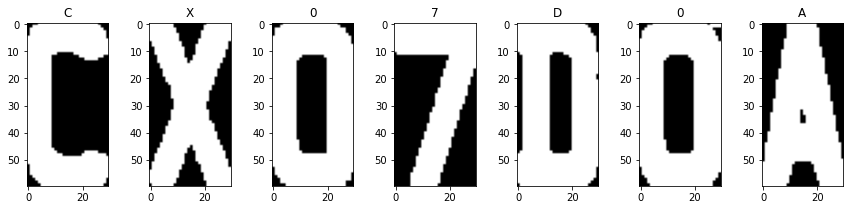

<Figure size 1008x288 with 0 Axes>

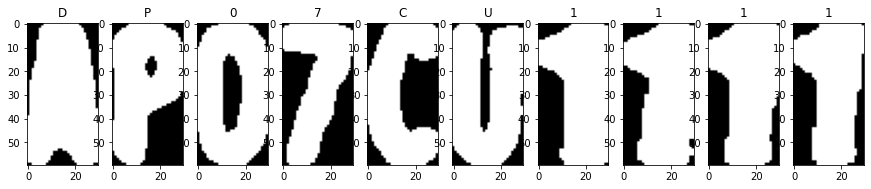

In [25]:
import os
pathi='/content/pop'
with open('test.csv','w') as f:
    f.write('SNo,Vehicle,Emergency,No Plate\n')
for counter,files in enumerate(os.listdir(pathi)):

    path=os.path.join(pathi,files)
    img = open_image(path)
    dataset=['Ambulance', 'Bus', 'Car', 'Limousine', 'Motorcycle', 'Taxi', 'Truck', 'Van']
    emerge=['Non-Emergency','Emergency']
    tens=model.predict(img)[-1].numpy()
    tens1=model1.predict(img)[-1].numpy()
    #print(count,dataset[np.argmax(tens)],emerge[np.argmax(tens1)],get_string_from_image(path))
    with open('test.csv','a') as f:
        f.write('{},{},{},{}\n'.format(counter,dataset[np.argmax(tens)],emerge[np.argmax(tens1)],get_string_from_image(path)))


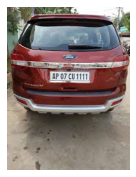

In [22]:
img.show()

In [9]:
from script import predict_plates,get_string_from_image

In [18]:
TEST_PATH='/content/baza_slika/040603'

1
PU253B


S66BN


227E0
ZG6839A
LJE797P
ZG4240AC



U
VT809T
SGD3164

BV595KX
HGAS18G2
SW71AE

ZD43CK
KC538AG
SK80BM
ZG425AC



SK253CL


ZG877TF


KZ386L
1NVX75


S663BN


P


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-336767ac337c>", line 1, in <module>
    predict_plates(TEST_PATH)
  File "/content/script.py", line 167, in predict_plates
    #print()
  File "/content/script.py", line 148, in get_string_from_image
    title = np.array2string(predict_from_model(character,model,labels))
  File "/content/script.py", line 78, in predict_from_model
    prediction = labels.inverse_transform([np.argmax(model.predict(image[np.newaxis,:]))])
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1462, in predict
    callbacks=callbacks)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_arrays.py", line 324, in predict_loop
    batch_outs = f(ins_batch)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py", line 3792, in _

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f54dabfc378> (for post_execute):


KeyboardInterrupt: ignored

<Figure size 1008x288 with 0 Axes>

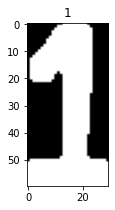

<Figure size 1008x288 with 0 Axes>

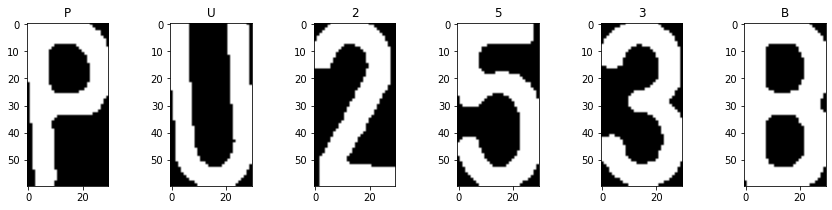

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

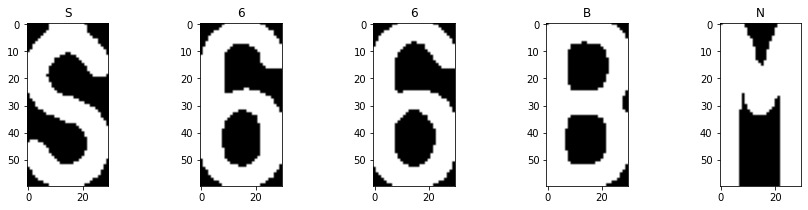

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

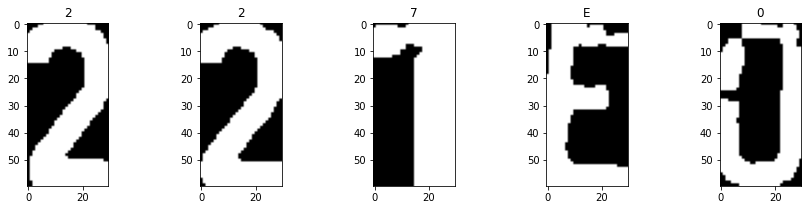

<Figure size 1008x288 with 0 Axes>

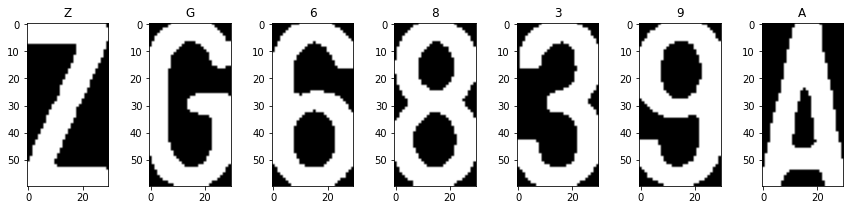

<Figure size 1008x288 with 0 Axes>

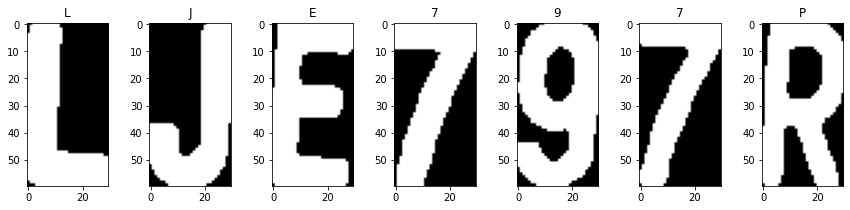

<Figure size 1008x288 with 0 Axes>

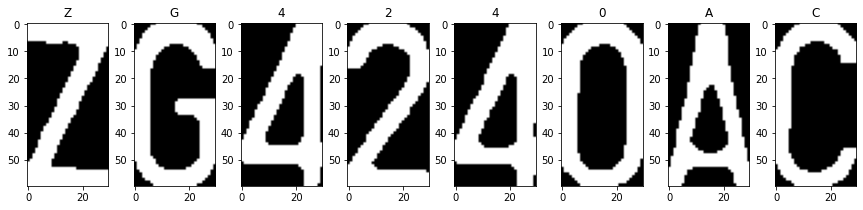

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

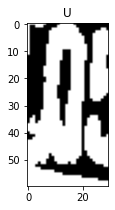

<Figure size 1008x288 with 0 Axes>

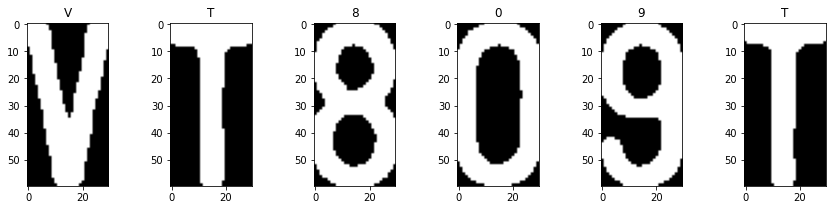

<Figure size 1008x288 with 0 Axes>

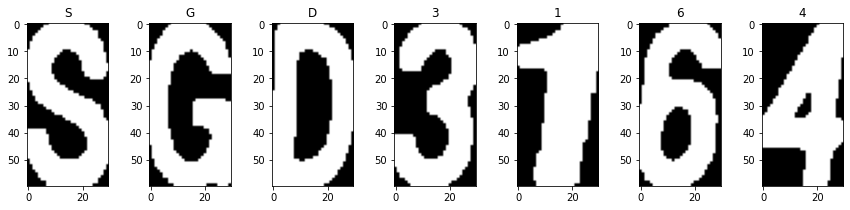

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

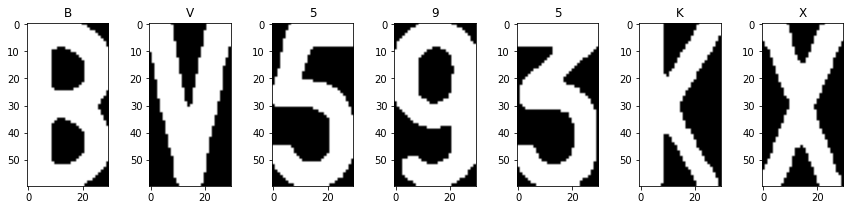

<Figure size 1008x288 with 0 Axes>

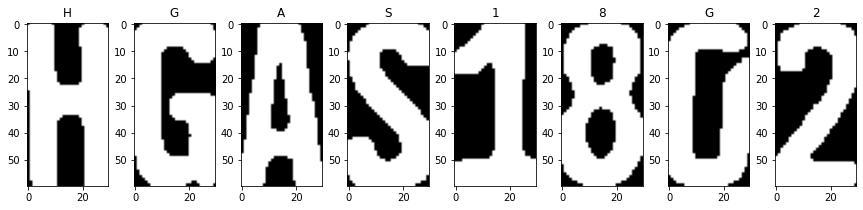

<Figure size 1008x288 with 0 Axes>

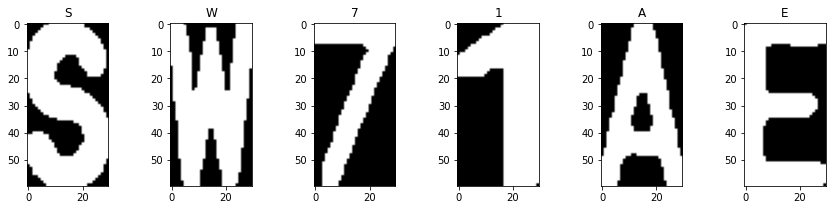

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

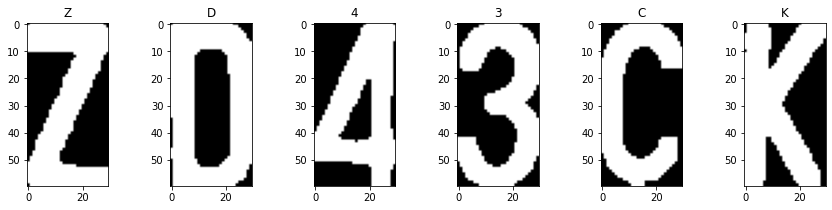

<Figure size 1008x288 with 0 Axes>

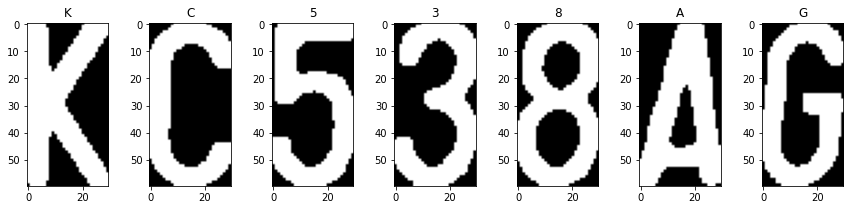

<Figure size 1008x288 with 0 Axes>

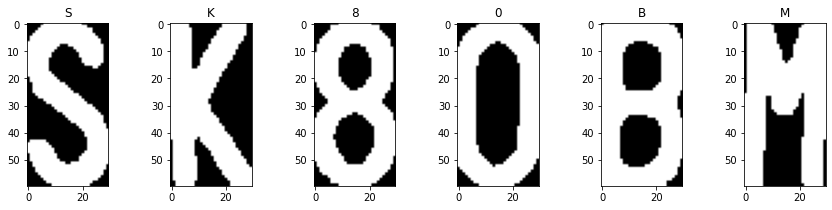

<Figure size 1008x288 with 0 Axes>

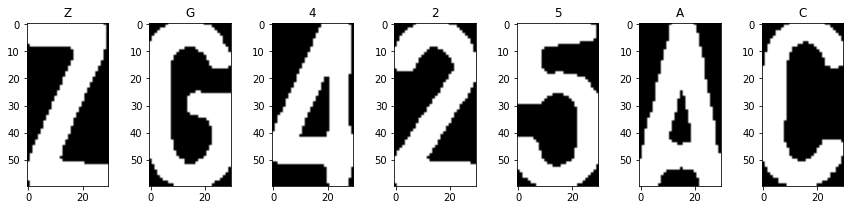

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

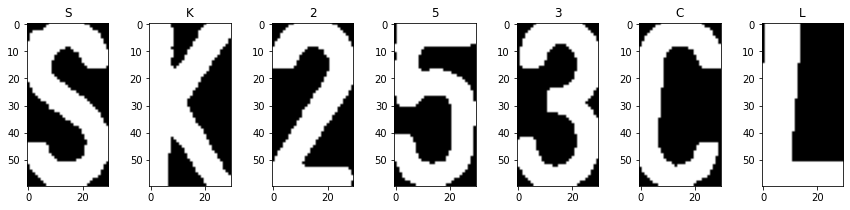

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

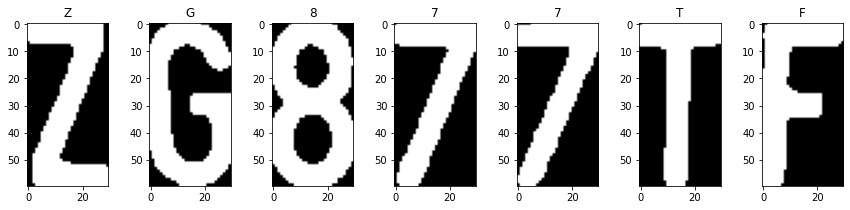

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

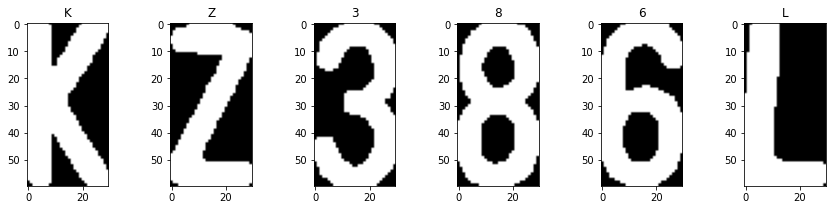

<Figure size 1008x288 with 0 Axes>

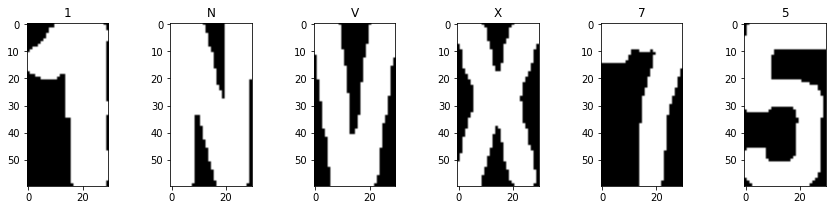

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

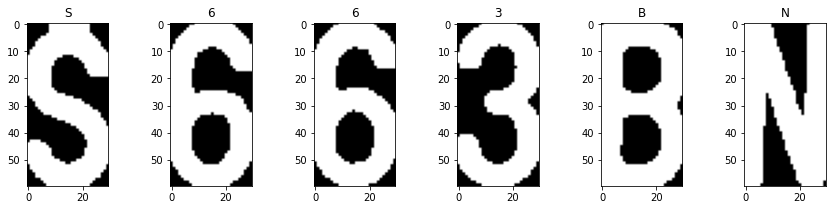

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1008x288 with 0 Axes>

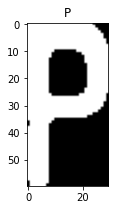

<Figure size 1008x288 with 0 Axes>

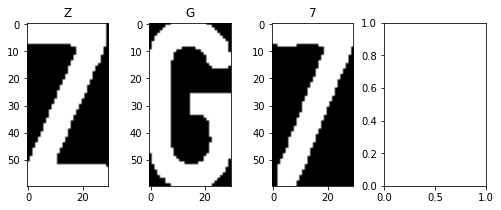

In [19]:
predict_plates(TEST_PATH)

In [11]:
!unrar x "pop.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from pop.rar

Creating    pop                                                       OK
Extracting  pop/front_ambulance.jpg                                       82%  OK 
Extracting  pop/front_bike.jpg                                            83%  OK 
Extracting  pop/front_car.jpg                                             98%  OK 
Extracting  pop/rear_car.jpg                                              99%  OK 
All OK


In [26]:
import pandas as pd
df=pd.read_csv('test.csv')

In [27]:
df

,SNo,Vehicle,Emergency,No Plate
0,0,Motorcycle,Non-Emergency,None
1,1,Car,Non-Emergency,MHACS7483
2,2,Car,Emergency,CX07D0A
3,3,Car,Emergency,DP07CU1111
